#### Polynomial fitting using DEAP
- Using an evolutionary algorithm, fit for the parameters a, b, c, and d to a third degree polynomial curve of the form y = ax^3 + bx^2 + cx + d.  
- Refer to https://deap.readthedocs.io/en/master/ for the package documentation.

#### Steps:

a. [Prepare DEAP routine](#a)

b. [Run genetic algorithm optimization](#b)

c. [Compare Fitted Parameters to Dummy Data](#c)

***

#### a. Prepare DEAP Routine<a id='a'></a>

In [1]:
import random

from deap import base
from deap import creator
from deap import tools

import numpy as np

from deap import algorithms

import matplotlib.pyplot as plt

numVariables=4

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()


toolbox.register("attr_init", random.uniform, -10, 10)

toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_init, numVariables)

# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


#create the polynomial function
def myFunc(pars):
    """Calculate a third degree polynomial: y = ax^3 + bx^2 + cx + d
    """
    y = pars[0]*x**3 + pars[1]*x**2 + pars[2]*x + pars[3]
    return y

x=np.linspace(-10,10, 100)
pars=[9, 3, 9, 2]
noise=np.random.uniform(-500, 500,100)
y=myFunc(pars)+noise

def rmse(individual):
    """Calculate the root mean square error
    """
    sse=np.average((y-myFunc(individual))**2)
    return np.sqrt(sse), #a comma is somehow needed

In [2]:
#register all parameters

toolbox.register("evaluate", rmse)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.5)
#or
#toolbox.register("mutate", tools.mutFlipBit, indpb=0.5)

#toolbox.register("mate", tools.cxESBlend, alpha=0.1) #invalid
#toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.3) #invalid

toolbox.register("select", tools.selTournament, tournsize=3)

#### b. Run Genetic Algorithm Optimization <a id='b'></a>

In [3]:
def main():
    random.seed(64)
    
    #create a population of size n
    pop = toolbox.population(n=200)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, 
                                   stats=stats, halloffame=hof, verbose=True)

    best=tools.selBest(pop,1)[0]
    
    print(best)
    
    return pop, stats, hof, best
    
if __name__ == "__main__":
    res=main()


gen	nevals	avg    	std    	min    	max    
0  	200   	3866.76	2238.42	295.583	7481.06
1  	113   	2095.69	1508.7 	295.583	7076.86
2  	138   	1244.61	1210.23	282.948	6842.47
3  	117   	843.193	1187.12	282.307	7021.64
4  	119   	574.722	902.75 	282.033	6789.5 
5  	128   	612.299	985.914	281.999	6758.4 
6  	106   	501.089	841.593	281.999	6789   
7  	120   	598.796	993.914	281.693	6750.96
8  	133   	493.158	731.335	281.693	6786.82
9  	102   	435.222	503.854	281.693	2542.2 
10 	107   	398.606	419.634	281.689	2335.86
11 	128   	408.203	456.259	281.689	2382.98
12 	143   	426.952	504.229	281.689	2337.22
13 	131   	344.333	289.789	281.689	2337.22
14 	119   	446.511	538.243	281.689	2337.3 
15 	123   	395.308	425.059	281.689	2337.22
16 	115   	373.853	377.759	281.689	2337.22
17 	126   	397.843	425.279	281.689	2337.22
18 	122   	416.867	445.314	281.689	2332.11
19 	119   	380.152	378.459	281.689	2337.22
20 	125   	351.664	291.886	281.689	2337.22
21 	115   	394.11 	425.215	281.689	2337.22
22 	112   	

#### c. Compare Fitted Parameters to Dummy Data <a id='c'></a>

actual: [9, 3, 9, 2]
fitted: [9.007969930421133, 3.12199655815418, 9.956052825351733, 9.956052825351733]
rmse: 281.6893628119619


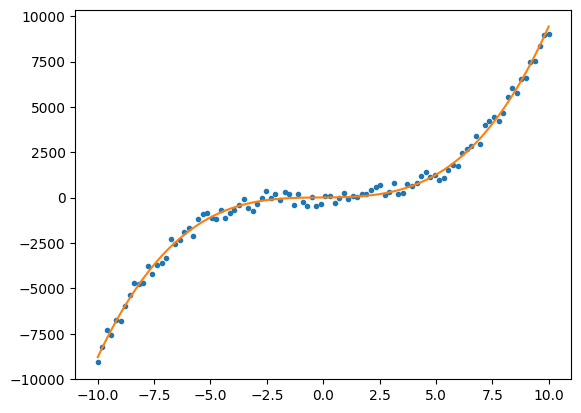

In [4]:
#actual: [9, 3, 9, 2]

print("actual: %s" %pars)
print("fitted: %s" %res[-1])
print("rmse: %s" %rmse(res[-1]))

y_fit=myFunc(res[-1])
plt.plot(x,y,'.')
plt.plot(x,y_fit)
plt.show()


***